# importing libraries

In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
import datetime as dt 

from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report 
from sklearn.preprocessing import LabelEncoder
#Libraries used for data  prprocessing 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb #Xtreme Gradient Boosting
#librries used for ignore warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv(r'C:\Users\lakshita\Desktop\datasets\BikeRentalData.csv')

In [4]:
data.head()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  registered  cnt  
0  0.2879  0.81        0.0          13   16  
1  0.2727  0.80        0.0          32   40  
2  0.2727  0.80        0.0          27   32  
3  0.2879  0.75        0.0          10   13  
4  0.2879  0.75        0.0           1    1

In [5]:
data.tail()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
17374       1   1    12  19        0        1           1           2  0.26   
17375       1   1    12  20        0        1           1           2  0.26   
17376       1   1    12  21        0        1           1           1  0.26   
17377       1   1    12  22        0        1           1           1  0.26   
17378       1   1    12  23        0        1           1           1  0.26   

        atemp   hum  windspeed  registered  cnt  
17374  0.2576  0.60     0.1642         108  119  
17375  0.2576  0.60     0.1642          81   89  
17376  0.2576  0.60     0.1642          83   90  
17377  0.2727  0.56     0.1343          48   61  
17378  0.2727  0.65     0.1343          37   49

In [6]:
data.describe()

season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.171850   
min        0.000000      0.000000      1.000000      0.020000      0.000000   
25%        1.000000      0.000000      1.000000      0.340000      0.333300   
50%        3.000000      1.000000      1.000000      0.500000      0.484800   
75%        5.000000      1.000000      2.000000      0.660000      0.621200   
max        6.000000      1.000000      4.000000      1.000000      1.000000   

                hum     windspeed    registered           cnt  
count  17379.000000  17379.000000  17379.000000  17379.000000  
mean       0.627229      0.190098    153.786869    189.463088  
std        0.192930      0.122340    151.357286    181.387599  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.480000      0.104500     34.000000     40.000000  
50%        0.630000      0.194000    115.000000    142.000000  
75%        0.780000      0.253700    220.000000    281.000000  
max        1.000000      0.850700    886.000000    977.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [8]:
data.describe(include='all')

season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.171850   
min        0.000000      0.000000      1.000000      0.020000      0.000000   
25%        1.000000      0.000000      1.000000      0.340000      0.333300   
50%        3.000000      1.000000      1.000000      0.500000      0.484800   
75%        5.000000      1.000000      2.000000      0.660000      0.621200   
max        6.000000      1.000000      4.000000      1.000000      1.000000   

                hum     windspeed    registered           cnt  
count  17379.000000  17379.000000  17379.000000  17379.000000  
mean       0.627229      0.190098    153.786869    189.463088  
std        0.192930      0.122340    151.357286    181.387599  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.480000      0.104500     34.000000     40.000000  
50%        0.630000      0.194000    115.000000    142.000000  
75%        0.780000      0.253700    220.000000    281.000000  
max        1.000000      0.850700    886.000000    977.000000

In [9]:
data.isna().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

In [10]:
data.shape

(17379, 14)

In [11]:
data.corr()

season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
yr         -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
mnth        0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hr         -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weathersit -0.014524 -0.019157  0.005400 -0.020203 -0.017036  0.003311   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.319380  0.039222  0.208096  0.133750 -0.030973 -0.008821   
hum         0.150625 -0.083546  0.164411 -0.276498 -0.010588 -0.037158   
windspeed  -0.149773 -0.008740 -0.135386  0.137252  0.003988  0.011502   
registered  0.174226  0.253684  0.122273  0.374141 -0.047345  0.021578   
cnt         0.178056  0.250495  0.120638  0.394071 -0.030927  0.026900   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013743   -0.014524  0.312025  0.319380  0.150625  -0.149773   
yr           -0.002196   -0.019157  0.040913  0.039222 -0.083546  -0.008740   
mnth         -0.003477    0.005400  0.201691  0.208096  0.164411  -0.135386   
hr            0.002285   -0.020203  0.137603  0.133750 -0.276498   0.137252   
holiday      -0.252471   -0.017036 -0.027340 -0.030973 -0.010588   0.003988   
weekday       0.035955    0.003311 -0.001795 -0.008821 -0.037158   0.011502   
workingday    1.000000    0.044672  0.055390  0.054667  0.015688  -0.011830   
weathersit    0.044672    1.000000 -0.102640 -0.105563  0.418130   0.026226   
temp          0.055390   -0.102640  1.000000  0.987672 -0.069881  -0.023125   
atemp         0.054667   -0.105563  0.987672  1.000000 -0.051918  -0.062336   
hum           0.015688    0.418130 -0.069881 -0.051918  1.000000  -0.290105   
windspeed    -0.011830    0.026226 -0.023125 -0.062336 -0.290105   1.000000   
registered    0.134326   -0.120966  0.335361  0.332559 -0.273933   0.082321   
cnt           0.030284   -0.142426  0.404772  0.400929 -0.322911   0.093234   

            registered       cnt  
season        0.174226  0.178056  
yr            0.253684  0.250495  
mnth          0.122273  0.120638  
hr            0.374141  0.394071  
holiday      -0.047345 -0.030927  
weekday       0.021578  0.026900  
workingday    0.134326  0.030284  
weathersit   -0.120966 -0.142426  
temp          0.335361  0.404772  
atemp         0.332559  0.400929  
hum          -0.273933 -0.322911  
windspeed     0.082321  0.093234  
registered    1.000000  0.972151  
cnt           0.972151  1.000000

In [12]:
data.groupby('season').mean()

yr       mnth         hr   holiday   weekday  workingday  \
season                                                                   
1       0.512494   3.119755  11.648515  0.038661  3.008722    0.658652   
2       0.500340   4.654117  11.512134  0.021774  2.991608    0.695396   
3       0.501779   7.689724  11.507562  0.021352  3.033141    0.698621   
4       0.495747  10.702505  11.522448  0.034026  2.979915    0.676749   

        weathersit      temp     atemp       hum  windspeed  registered  \
season                                                                    
1         1.460160  0.299147  0.298116  0.581348   0.215107   96.823668   
2         1.443638  0.544663  0.520547  0.627022   0.203410  162.183488   
3         1.330294  0.706410  0.656004  0.633167   0.171593  185.729093   
4         1.472117  0.423138  0.415738  0.667124   0.170819  168.202032   

               cnt  
season              
1       111.114569  
2       208.344069  
3       236.016237  
4       198.868856

In [13]:
data.groupby('season').size()

season
1    4242
2    4409
3    4496
4    4232
dtype: int64

In [14]:
data.groupby('yr').mean()

season      mnth         hr   holiday   weekday  workingday  weathersit  \
yr                                                                              
0   2.513592  6.573973  11.573626  0.027646  3.012724    0.683748    1.437594   
1   2.489810  6.501946  11.520151  0.029883  2.994733    0.681704    1.413098   

        temp     atemp       hum  windspeed  registered         cnt  
yr                                                                   
0   0.489069  0.469000  0.643430   0.191172  115.193869  143.794448  
1   0.504825  0.482481  0.611193   0.189034  191.986604  234.666361

In [15]:
data.groupby('yr').size()

yr
0    8645
1    8734
dtype: int64

In [16]:
data.groupby('mnth').mean()

season        yr         hr   holiday   weekday  workingday  \
mnth                                                                  
1     1.000000  0.518544  11.696991  0.049685  2.869839    0.634710   
2     1.000000  0.516033  11.662192  0.035048  3.011186    0.680835   
3     1.355737  0.504413  11.581806  0.000000  3.107943    0.725730   
4     2.000000  0.499652  11.517049  0.033403  3.002784    0.665971   
5     2.000000  0.500000  11.500000  0.032258  2.903226    0.693548   
6     2.333333  0.500000  11.500000  0.000000  3.100000    0.716667   
7     3.000000  0.500000  11.500000  0.032258  2.935484    0.661290   
8     3.000000  0.504407  11.503729  0.000000  3.002034    0.748475   
9     3.267223  0.501044  11.519833  0.033403  3.051496    0.665971   
10    4.000000  0.487939  11.547209  0.033081  2.957960    0.669194   
11    4.000000  0.499652  11.518441  0.066806  3.033403    0.665971   
12    2.942009  0.500337  11.526635  0.031018  3.070128    0.662171   

      weathersit      temp     atemp       hum  windspeed  registered  \
mnth                                                                    
1       1.456963  0.237649  0.240676  0.580931   0.207551   85.997901   
2       1.459359  0.300209  0.300621  0.567211   0.215961  101.706935   
3       1.474542  0.390903  0.382299  0.589050   0.222517  125.238289   
4       1.456507  0.470021  0.457110  0.588114   0.234323  144.949200   
5       1.461694  0.594798  0.565662  0.688958   0.182989  172.312500   
6       1.290972  0.684097  0.638246  0.575806   0.185420  189.191667   
7       1.254032  0.755470  0.704094  0.597876   0.166059  179.295027   
8       1.322712  0.708705  0.651556  0.637227   0.171468  189.257627   
9       1.488518  0.616507  0.579344  0.714454   0.165856  191.835769   
10      1.509993  0.487181  0.473913  0.689490   0.171919  180.973122   
11      1.403619  0.369200  0.367339  0.625045   0.183764  151.863605   
12      1.529332  0.324167  0.326296  0.666116   0.176574  127.675657   

             cnt  
mnth              
1      94.424773  
2     112.865026  
3     155.410726  
4     187.260960  
5     222.907258  
6     240.515278  
7     231.819892  
8     238.097627  
9     240.773138  
10    222.158511  
11    177.335421  
12    142.303439

In [17]:
data.groupby('mnth').size()

mnth
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
dtype: int64

In [18]:
data.groupby('registered').size()

registered
0       24
1      201
2      245
3      294
4      307
      ... 
860      1
871      1
876      2
885      1
886      1
Length: 776, dtype: int64

In [19]:
data.groupby('registered').mean()

season        yr       mnth         hr   holiday   weekday  \
registered                                                                 
0           1.833333  0.083333   4.916667   3.125000  0.041667  2.541667   
1           1.646766  0.303483   3.980100   3.606965  0.019900  2.676617   
2           1.902041  0.367347   5.163265   3.391837  0.024490  2.820408   
3           2.221088  0.418367   5.979592   3.469388  0.037415  2.812925   
4           2.433225  0.371336   6.306189   3.306189  0.029316  2.915309   
...              ...       ...        ...        ...       ...       ...   
860         4.000000  1.000000   9.000000  17.000000  0.000000  2.000000   
871         4.000000  1.000000  10.000000  17.000000  0.000000  2.000000   
876         4.000000  1.000000   9.500000  17.000000  0.000000  3.000000   
885         3.000000  1.000000   9.000000  17.000000  0.000000  4.000000   
886         3.000000  1.000000   9.000000  18.000000  0.000000  3.000000   

            workingday  weathersit      temp     atemp       hum  windspeed  \
registered                                                                    
0             0.791667    1.541667  0.356667  0.349117  0.712500   0.151121   
1             0.746269    1.552239  0.289950  0.290746  0.694328   0.195446   
2             0.791837    1.546939  0.347184  0.341621  0.704531   0.180144   
3             0.785714    1.574830  0.387891  0.381004  0.740646   0.160479   
4             0.768730    1.423453  0.433420  0.422220  0.742150   0.153005   
...                ...         ...       ...       ...       ...        ...   
860           1.000000    1.000000  0.660000  0.621200  0.390000   0.283600   
871           1.000000    1.000000  0.680000  0.636400  0.410000   0.000000   
876           1.000000    1.000000  0.700000  0.643950  0.475000   0.149250   
885           1.000000    1.000000  0.640000  0.621200  0.500000   0.223900   
886           1.000000    1.000000  0.660000  0.621200  0.440000   0.253700   

                   cnt  
registered              
0             1.458333  
1             1.462687  
2             2.644898  
3             3.925170  
4             5.218241  
...                ...  
860         967.000000  
871         938.000000  
876         958.000000  
885         976.000000  
886         977.000000  

[776 rows x 13 columns]

# scatter matrix

<Figure size 2000x2000 with 0 Axes>

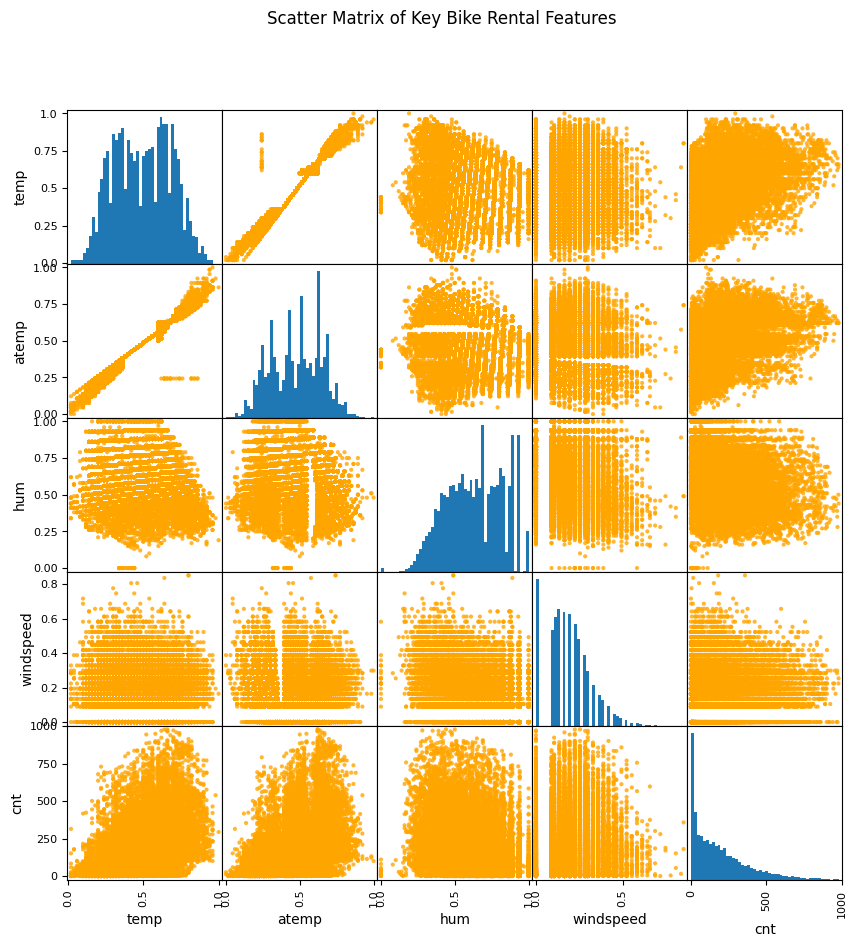

In [21]:
cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']  # Use only numerical features
abc = data[cols]
plt.figure(figsize=(20, 20))
scatter_matrix(abc, alpha=0.8, figsize=(10, 10), color='orange', hist_kwds={'bins': 50})
plt.suptitle("Scatter Matrix of Key Bike Rental Features")
plt.show()

# pairplot

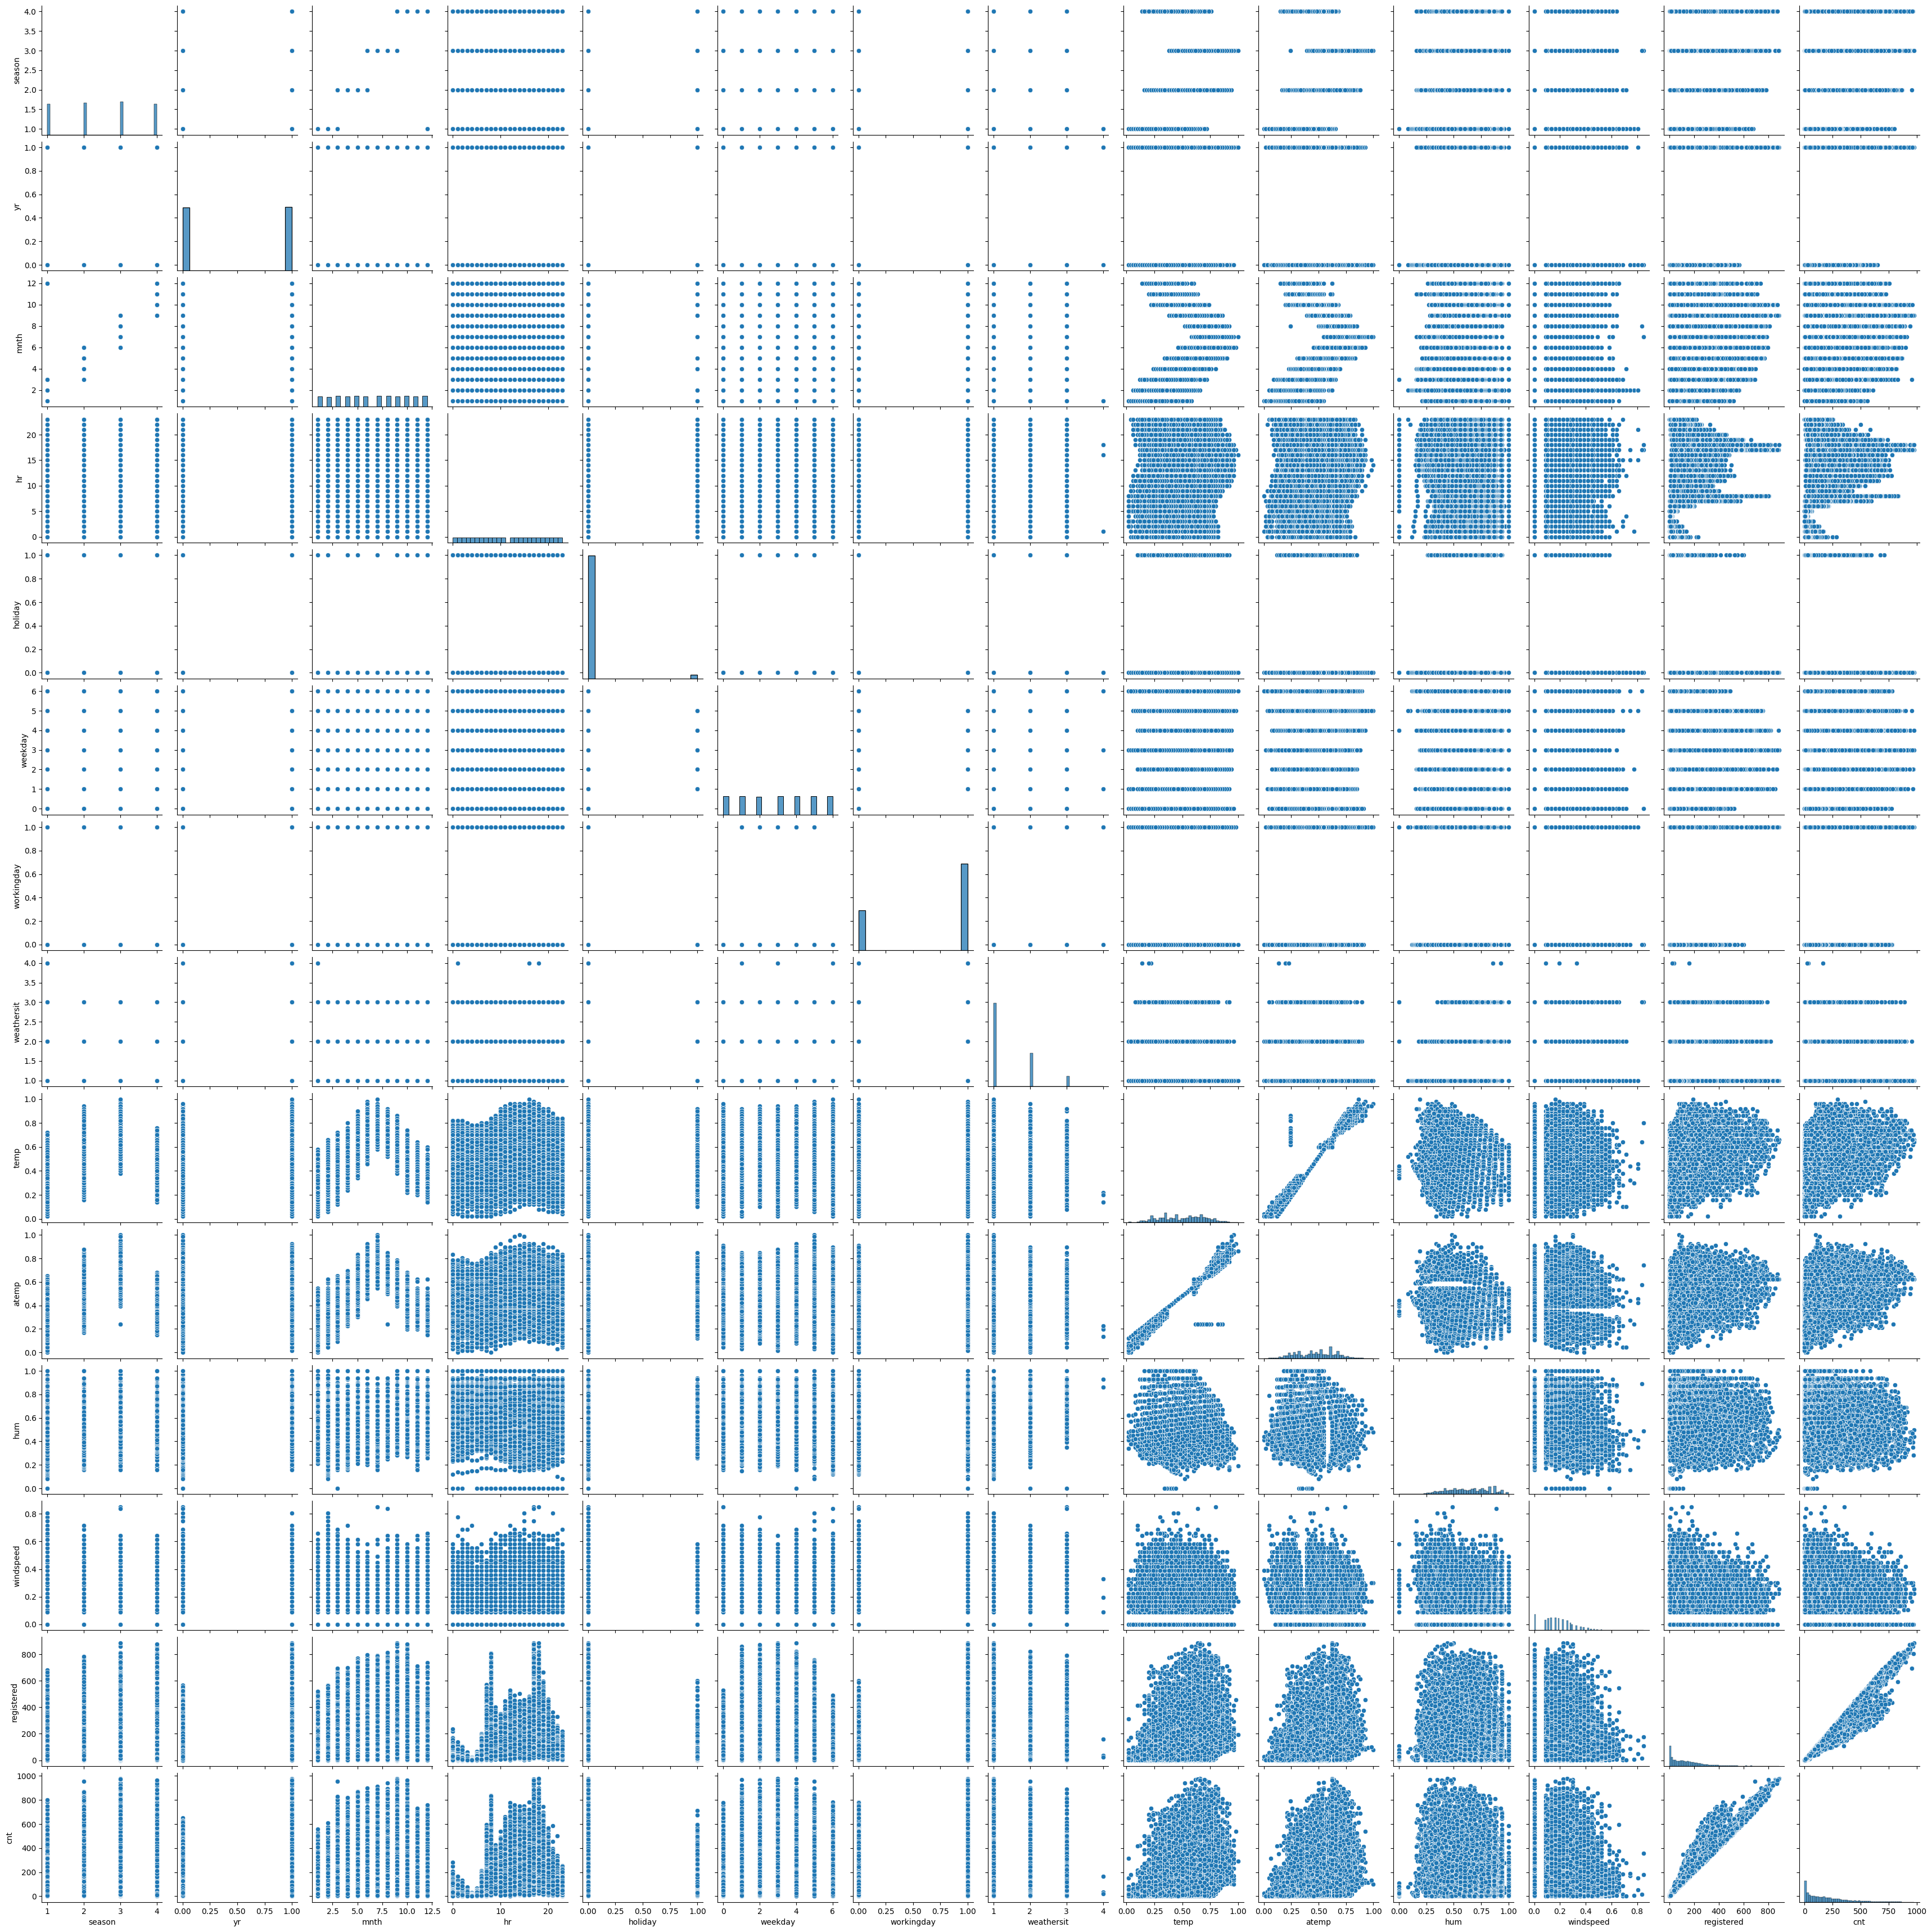

In [23]:
sns.pairplot(data)
plt.show()

# Graph Temp vs Bike rental

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  registered  cnt  
0  0.2879  0.81        0.0          13   16  
1  0.2727  0.80        0.0          32   40  
2  0.2727  0.80        0.0          27   32  
3  0.2879  0.75        0.0          10   13  
4  0.2879  0.75        0.0           1    1  


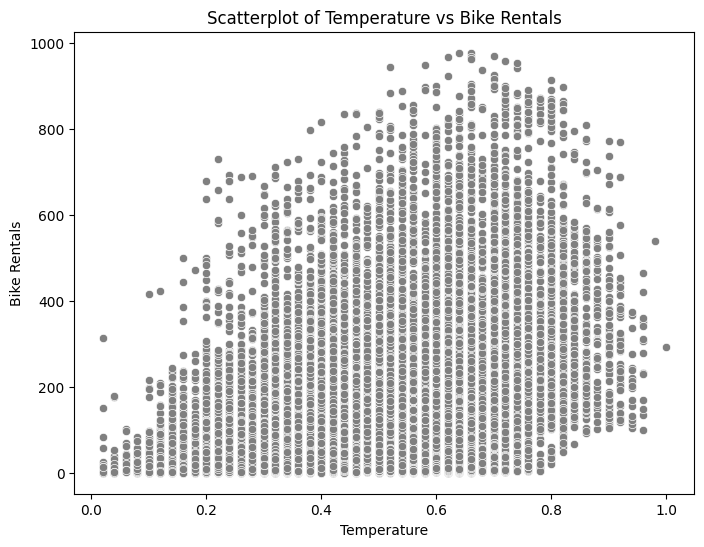

In [25]:
print(data.head())
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='temp', y='cnt', data=data, color='grey') 
plt.title('Scatterplot of Temperature vs Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')
plt.show()

# *Target Variable defined*

In [27]:
target_variable='cnt'

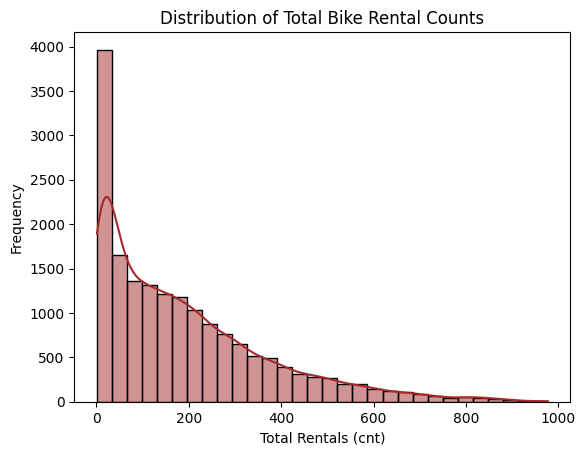

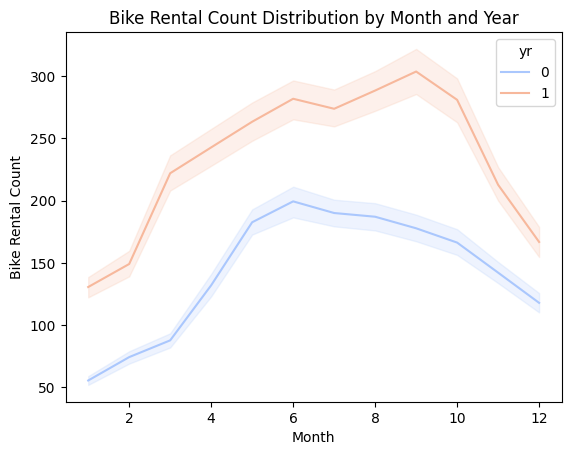

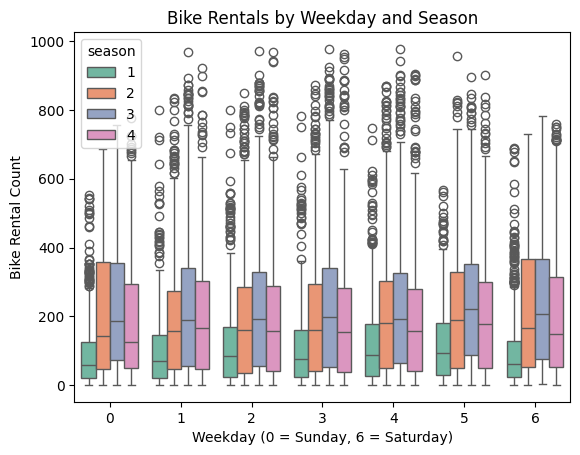

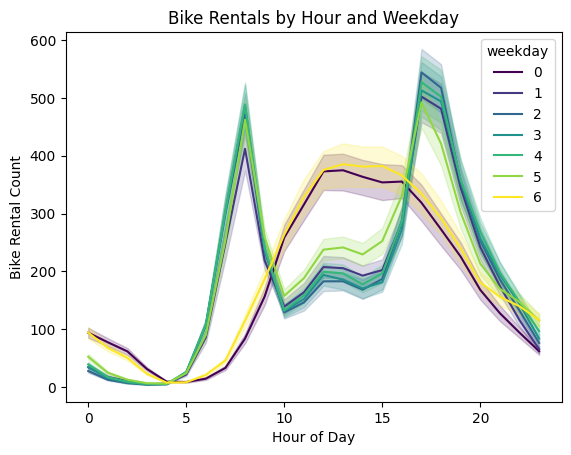

In [28]:
sns.histplot(data['cnt'], kde=True, color='brown', bins=30)
plt.title("Distribution of Total Bike Rental Counts")
plt.xlabel("Total Rentals (cnt)")
plt.ylabel("Frequency")
plt.show()
sns.lineplot(x='mnth', y='cnt', hue='yr', data=data, palette='coolwarm')
plt.title("Bike Rental Count Distribution by Month and Year")
plt.xlabel("Month")
plt.ylabel("Bike Rental Count")
plt.show()
sns.boxplot(x='weekday', y='cnt', hue='season', data=data, palette='Set2')
plt.title("Bike Rentals by Weekday and Season")
plt.xlabel("Weekday (0 = Sunday, 6 = Saturday)")
plt.ylabel("Bike Rental Count")
plt.show()
sns.lineplot(x='hr', y='cnt', hue='weekday', data=data, palette='viridis')
plt.title("Bike Rentals by Hour and Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Bike Rental Count")
plt.show()

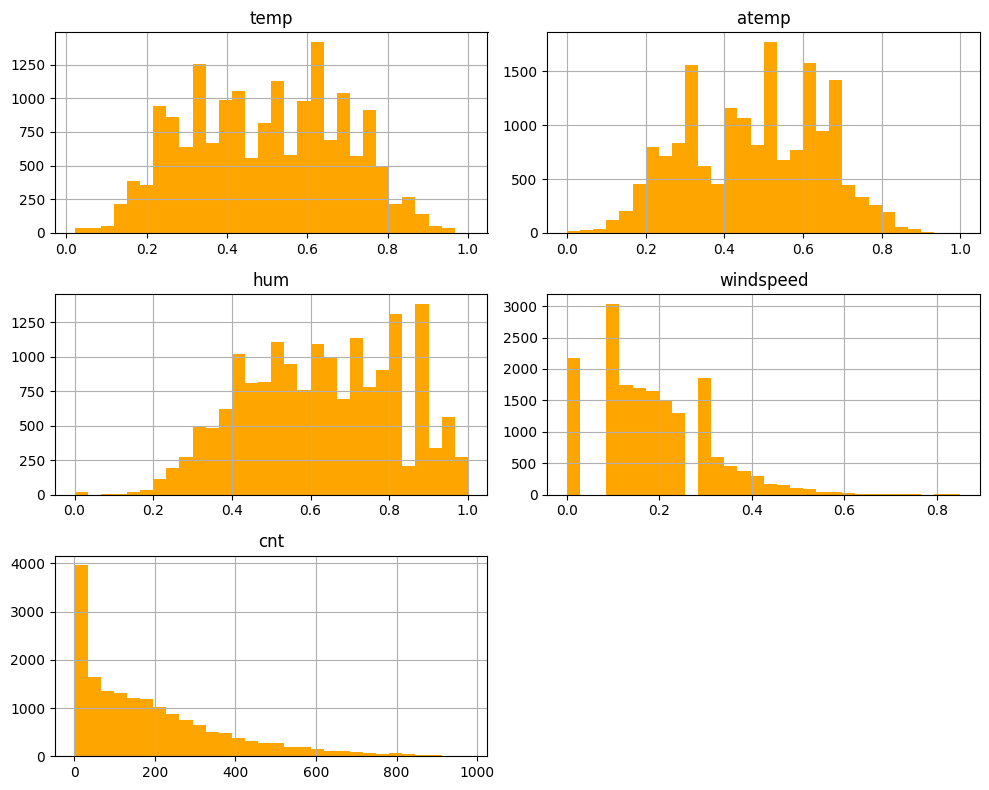

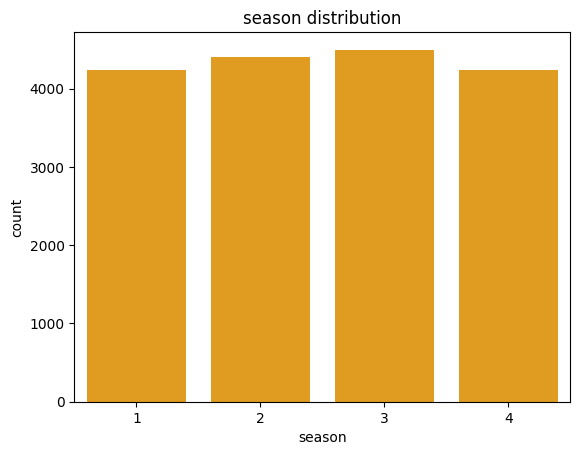

In [29]:
data[['temp','atemp', 'hum', 'windspeed', 'cnt']].hist(figsize=(10,8), bins=30, color='orange')
plt.tight_layout()
plt.show()
sns.countplot(x='season', data=data,color='orange')
plt.title('season distribution')
plt.show()

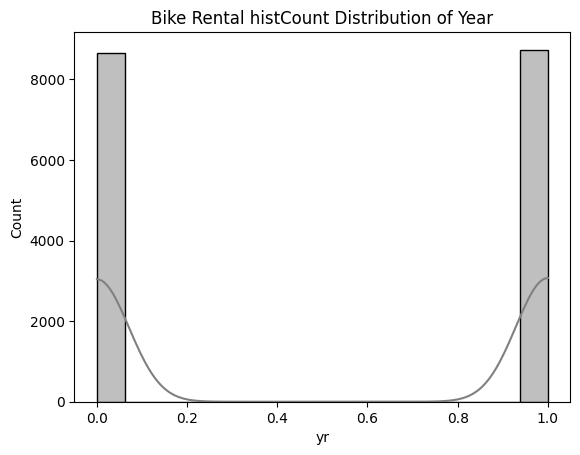

In [30]:
sns.histplot(x=data['yr'], kde=True, color='grey')
plt.title("Bike Rental histCount Distribution of Year")
plt.show()

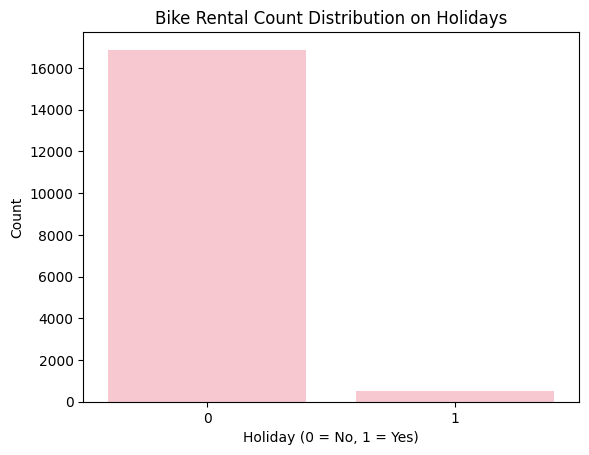

In [31]:
sns.countplot(x='holiday', data=data, color='pink')
plt.title("Bike Rental Count Distribution on Holidays")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

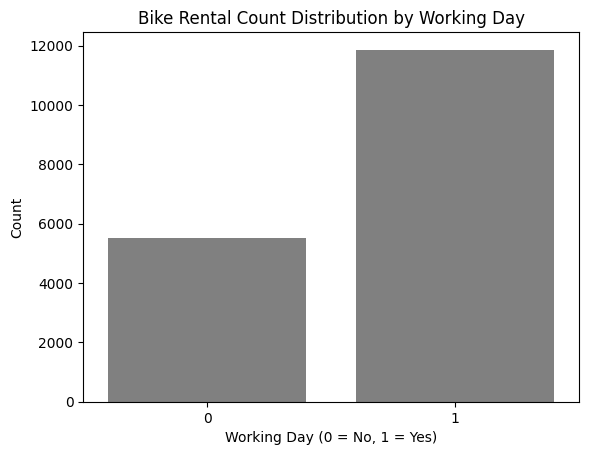

In [32]:
sns.countplot(x='workingday', data=data, color='grey')
plt.title("Bike Rental Count Distribution by Working Day")
plt.xlabel("Working Day (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

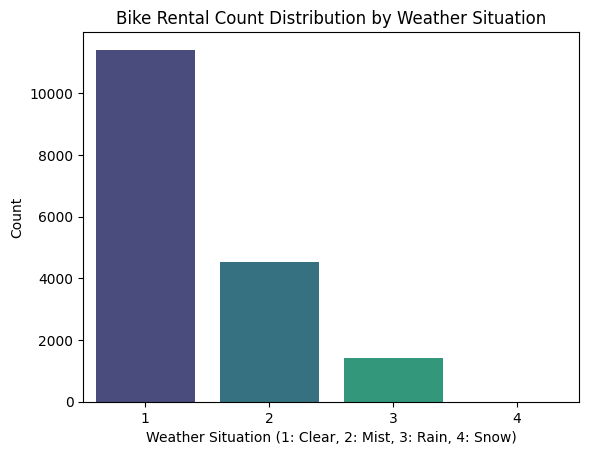

In [33]:
sns.countplot(x='weathersit', data=data, palette='viridis')
plt.title("Bike Rental Count Distribution by Weather Situation")
plt.xlabel("Weather Situation (1: Clear, 2: Mist, 3: Rain, 4: Snow)")
plt.ylabel("Count")
plt.show()

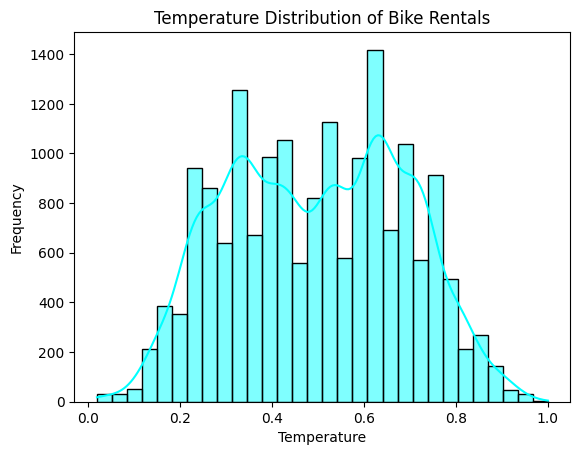

In [34]:
sns.histplot(x=data['temp'], kde=True, color='cyan', bins=30)
plt.title("Temperature Distribution of Bike Rentals")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

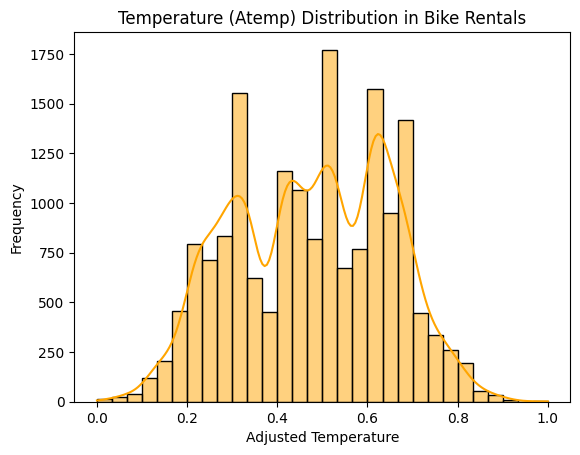

In [35]:
sns.histplot(x=data['atemp'], kde=True, color='orange', bins=30)
plt.title("Temperature (Atemp) Distribution in Bike Rentals")
plt.xlabel("Adjusted Temperature")
plt.ylabel("Frequency")
plt.show()

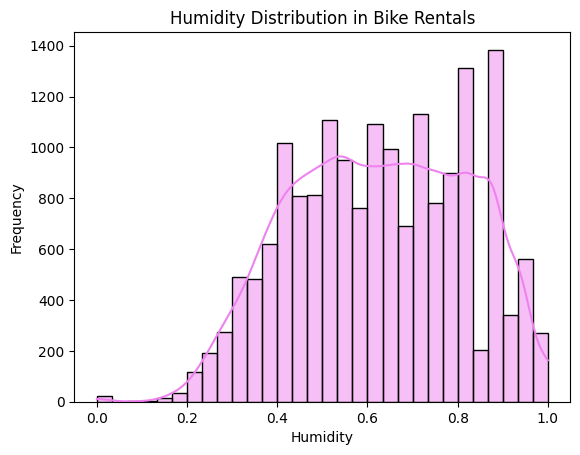

In [36]:
sns.histplot(x=data['hum'], kde=True, color='violet', bins=30)
plt.title("Humidity Distribution in Bike Rentals")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.show()

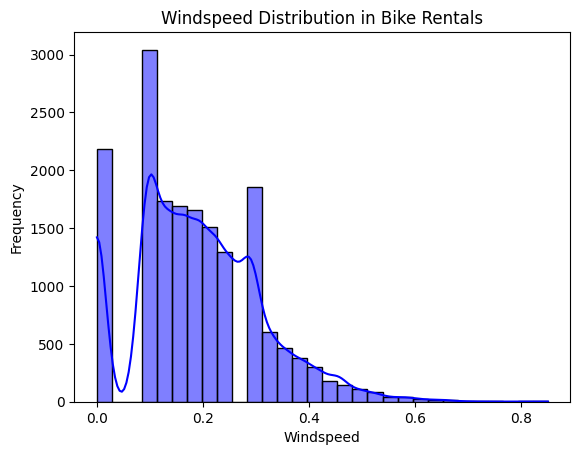

In [37]:
sns.histplot(x=data['windspeed'], kde=True, color='blue', bins=30)
plt.title("Windspeed Distribution in Bike Rentals")
plt.xlabel("Windspeed")
plt.ylabel("Frequency")
plt.show()

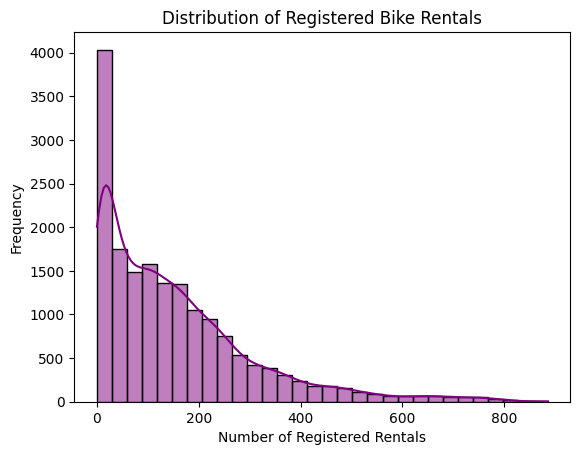

In [38]:
sns.histplot(x=data['registered'], kde=True, color='purple', bins=30)
plt.title("Distribution of Registered Bike Rentals")
plt.xlabel("Number of Registered Rentals")
plt.ylabel("Frequency")
plt.show()

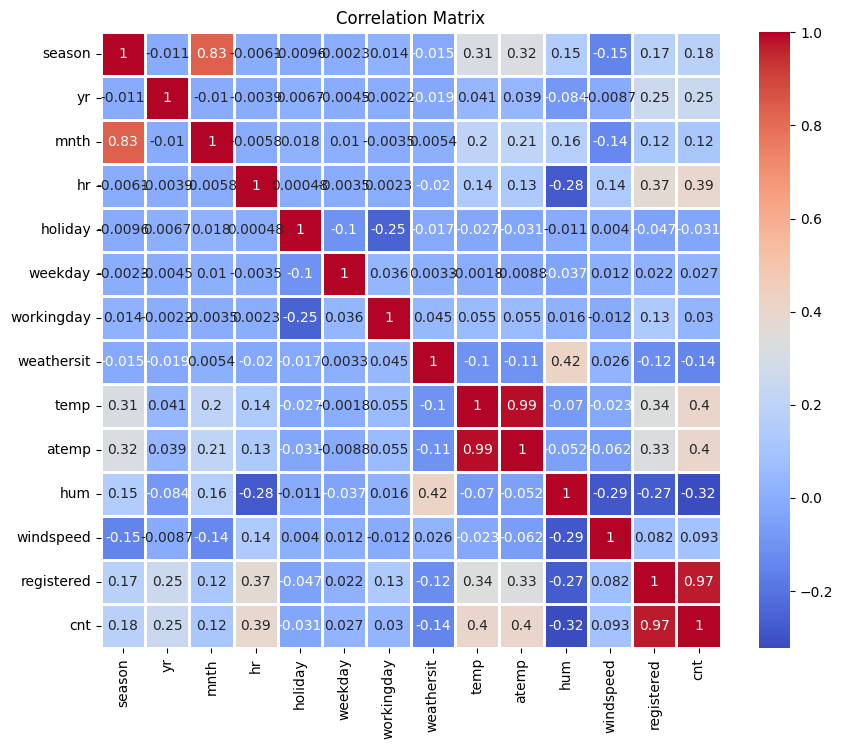

In [39]:
plt.figure(figsize=(10,8))
correlation_matrix = data.corr()  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

# data cleaning

In [41]:
# Strategy: Fill missing numerical values with the median
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
data[['temp', 'hum', 'windspeed']] = num_imputer.fit_transform(data[['temp', 'hum', 'windspeed']])

# Strategy: Fill missing categorical values with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data[['holiday', 'weekday']] = cat_imputer.fit_transform(data[['holiday', 'weekday']])


In [42]:
# Drop duplicates (if any)
data = data.drop_duplicates()

# Handle missing values (if applicable)
# Example: Fill with mean values or drop
data.fillna(data.mean(), inplace=True)

# Confirm changes
print("\nData after Cleaning:")
print(data.info())

# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()



Data after Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 17377 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17377 non-null  int64  
 1   yr          17377 non-null  int64  
 2   mnth        17377 non-null  int64  
 3   hr          17377 non-null  int64  
 4   holiday     17377 non-null  int64  
 5   weekday     17377 non-null  int64  
 6   workingday  17377 non-null  int64  
 7   weathersit  17377 non-null  int64  
 8   temp        17377 non-null  float64
 9   atemp       17377 non-null  float64
 10  hum         17377 non-null  float64
 11  windspeed   17377 non-null  float64
 12  registered  17377 non-null  int64  
 13  cnt         17377 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.0 MB
None


In [43]:
# For numerical features
data.fillna(data.median(), inplace=True)

# For categorical features
data.fillna(data.mode().iloc[0], inplace=True)


# encoding categorical features

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for ordinal features
encoder = LabelEncoder()
for col in ['holiday', 'weekday', 'workingday']:
    data[col] = encoder.fit_transform(data[col])

print("\nEncoded Categorical Features:")
print(data.head())

# Since 'weathersit' has already been transformed into weathersit_2, we will not include it here
categorical_columns = ['holiday', 'weekday', 'workingday']

# One-hot encode these categorical columns while dropping the first category to prevent multicollinearity
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check the resulting DataFrame
print("\nData after One-Hot Encoding:\n", data.head())



Encoded Categorical Features:
   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  registered  cnt  
0  0.2879  0.81        0.0          13   16  
1  0.2727  0.80        0.0          32   40  
2  0.2727  0.80        0.0          27   32  
3  0.2879  0.75        0.0          10   13  
4  0.2879  0.75        0.0           1    1  

Data after One-Hot Encoding:
    season  yr  mnth  hr  weathersit  temp   atemp   hum  windspeed  \
0       1   0     1   0           1  0.24  0.2879  0.81        0.0   
1       1   0     1   1           1  0.22  0.2727  0.80        0.0   
2

# Data Normalization/ Feature Scaling    &   Data  Splitting

In [47]:
# Separating features (X) and target variable (y)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].values  # All columns except the last (features)
y = data.iloc[:, -1].values   # The last column (target: cnt)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("\nFeature Scaling Completed!")

# Min-Max Scaling (alternative to Standard Scaling)
min_max_scaler = MinMaxScaler()
scaled_features_mm = min_max_scaler.fit_transform(data.iloc[:, :-1])
data_scaled_mm = pd.DataFrame(scaled_features_mm, columns=data.columns[:-1])
data_scaled_mm['cnt'] = data['cnt']



Feature Scaling Completed!


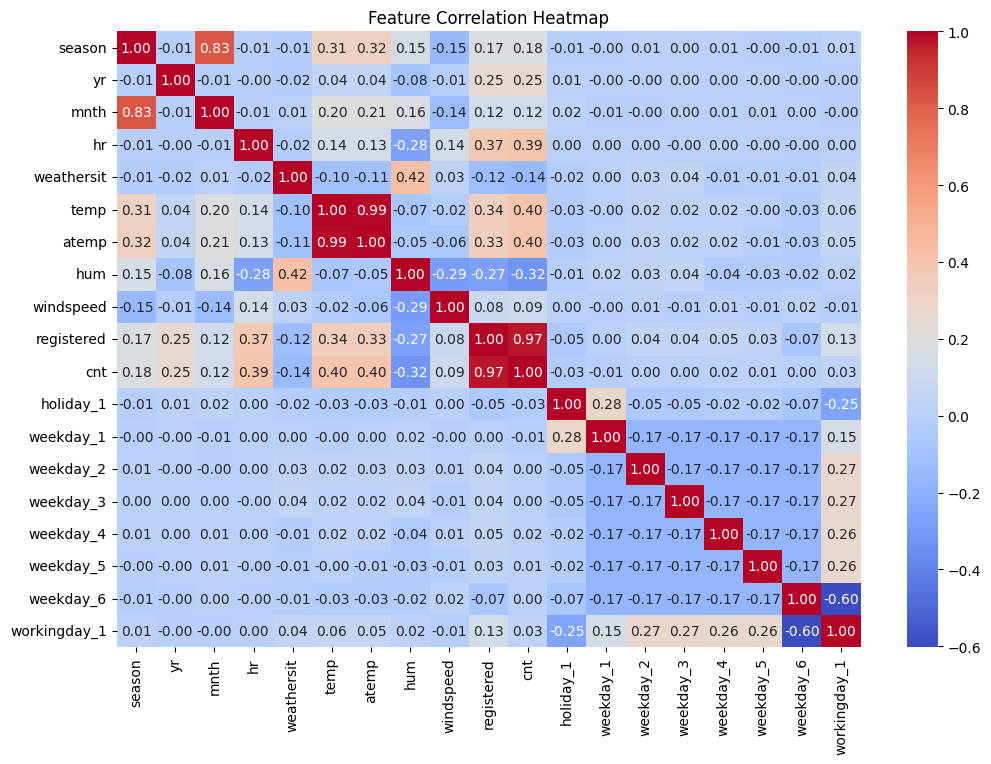

In [48]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

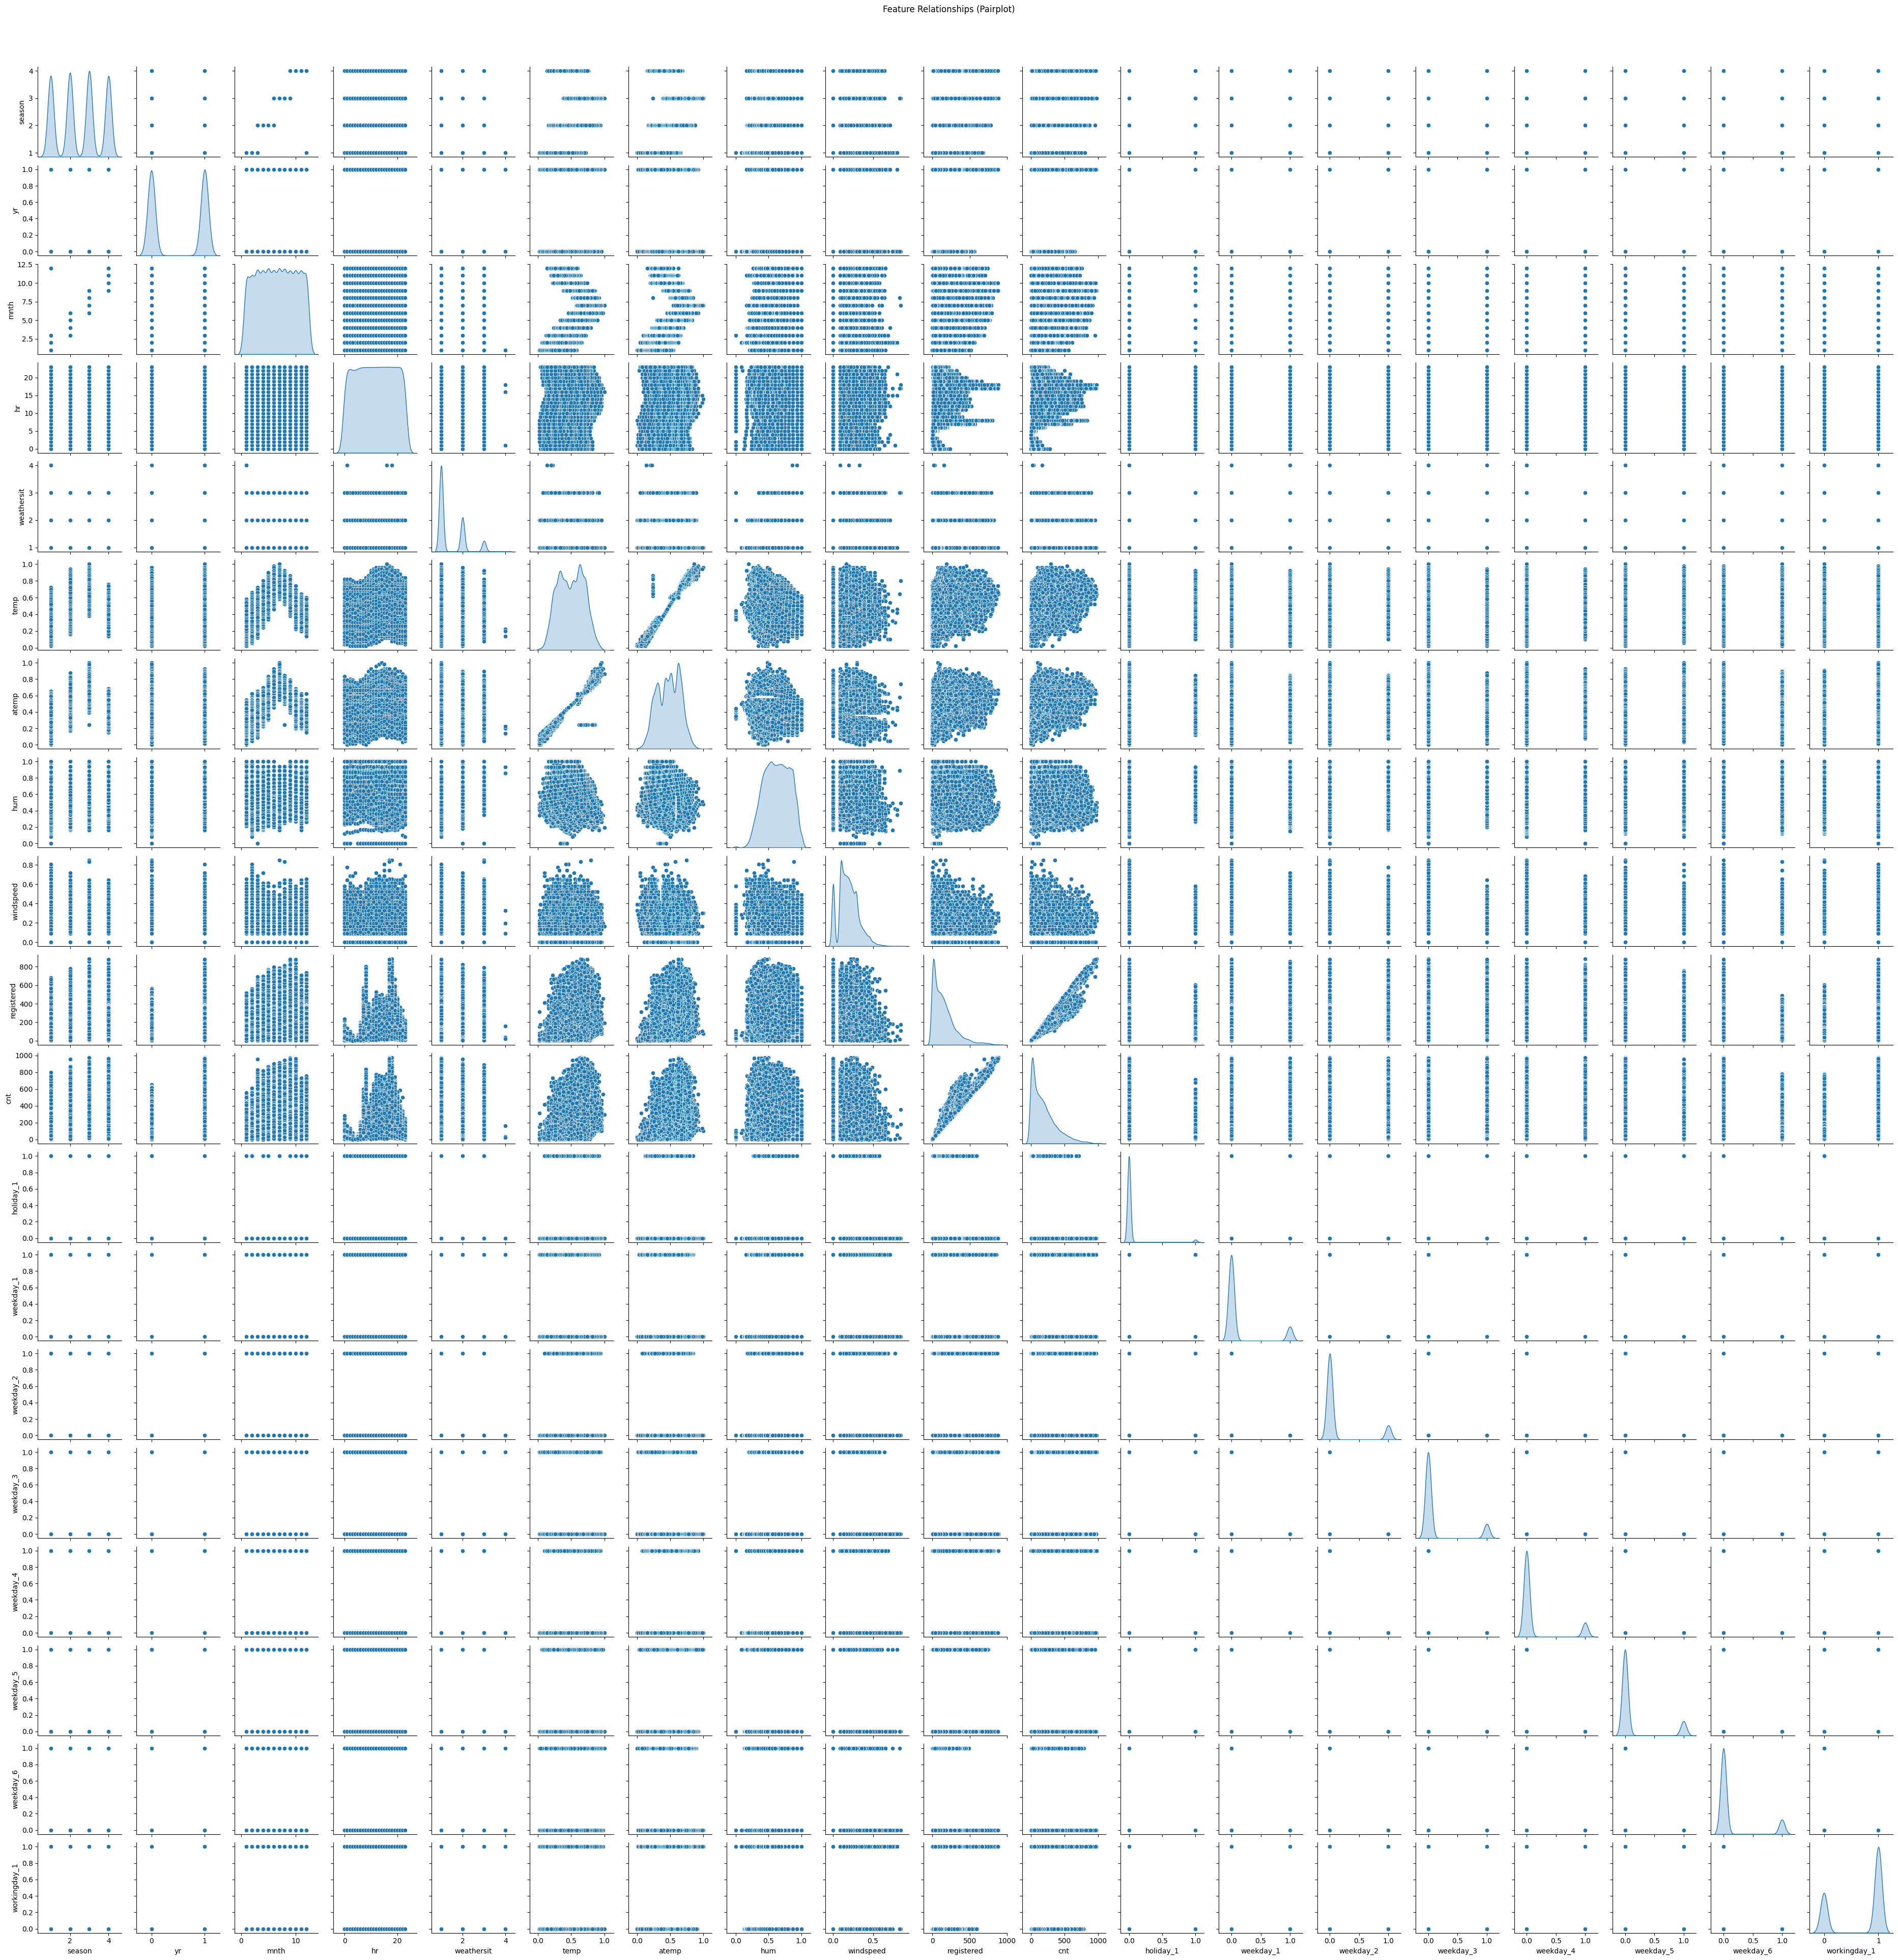

In [49]:
# Pairplot to visualize relationships
sns.pairplot(data, diag_kind='kde', markers='o', height=2)
plt.suptitle("Feature Relationships (Pairplot)", y=1.02)
plt.show()

# Feature Selection

In [51]:
# Drop features with low correlation with target variable
correlation = data.corr()['cnt']
low_corr_features = correlation[abs(correlation) < 0.1].index
data.drop(columns=low_corr_features, inplace=True)


# Handling Outliers

In [53]:
# Using IQR to remove outliers only if the column exists
for col in ['temp', 'hum', 'windspeed']:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        print(f"Outliers in {col} removed")
    else:
        print(f"Column {col} not found in DataFrame")

Outliers in temp removed
Outliers in hum removed
Column windspeed not found in DataFrame


# Balancing the dataset

In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ensure target variable is categorical
data['cnt_bins'] = pd.qcut(data['cnt'], q=4)
data['cnt_bins'] = data['cnt_bins'].astype(str)

# Split into features and target
X = data.drop(['cnt', 'cnt_bins'], axis=1)
y = data['cnt_bins']

# Convert categorical features to numerical
X = pd.get_dummies(X)

# Encode target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Check class distribution before SMOTE
print("\nClass distribution before balancing:")
print(pd.Series(y).value_counts())

# Find smallest class size
class_counts = pd.Series(y).value_counts()
min_class_size = class_counts.min()

# Set a safe k_neighbors value
k_neighbors_value = max(1, min(min_class_size - 1, 5))
print(f"Using k_neighbors: {k_neighbors_value}")

# Apply SMOTE with safe k_neighbors
smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)
X_res, y_res = smote.fit_resample(X, y)

# Check class distribution after balancing
print("\nClass distribution after balancing:")
print(pd.Series(y_res).value_counts())


Class distribution before balancing:
0    4357
1    4345
3    4327
2    4326
Name: count, dtype: int64
Using k_neighbors: 5

Class distribution after balancing:
0    4357
3    4357
1    4357
2    4357
Name: count, dtype: int64


In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [57]:
sns.pairplot(data, diag_kind='kde', markers='o', height=2)

#  ML Model Implementation

In [59]:
from sklearn.model_selection import train_test_split

# As `data` is a DataFrame containing your dataset
array = data.values  # Convert DataFrame to NumPy array if not already

# Slicing features (X) and target (y)
x = array[:, :4]  # Select first 4 columns as features
y = array[:, 4]   # Select the 5th column as the target variable

# Splitting the dataset into training and testing sets
validation_size = 0.20  # 20% of the data for testing
seed = 6  # Random seed for reproducibility

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

# Print shapes for verification
print("Training feature set shape:", x_train.shape)
print("Testing feature set shape:", x_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)


Training feature set shape: (13884, 4)
Testing feature set shape: (3471, 4)
Training target set shape: (13884,)
Testing target set shape: (3471,)


In [60]:
# Check processed data
print("Processed Training Data Shape:", x_train.shape)
print("Processed Testing Data Shape:", x_test.shape)


Processed Training Data Shape: (13884, 4)
Processed Testing Data Shape: (3471, 4)


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

# Display results
for model, metrics in results.items():
    print(f"{model} Results:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 30)

# Select the best model based on R2 Score
best_model = max(results, key=lambda x: results[x]["R2 Score"])
print(f"Best Model: {best_model} with R2 Score: {results[best_model]['R2 Score']:.4f}")


Linear Regression Results:
  MAE: 0.5496
  MSE: 0.3906
  R2 Score: 0.0001
------------------------------
Random Forest Results:
  MAE: 0.5354
  MSE: 0.4043
  R2 Score: -0.0351
------------------------------
XGBoost Results:
  MAE: 0.5341
  MSE: 0.3992
  R2 Score: -0.0221
------------------------------
Neural Network Results:
  MAE: 0.5339
  MSE: 0.3826
  R2 Score: 0.0206
------------------------------
Best Model: Neural Network with R2 Score: 0.0206
